## 1.

在Python命令行，或保存为脚本文件后运行

In [1]:
import numpy as np
np.warnings.filterwarnings('ignore')

In [2]:
a = np.random.randint(0,9,3)
b = np.random.randint(0,9,4)
c = np.convolve(a,b)
s = "The convolution of" + np.array_str(a)+" and " + np.array_str(b) +" is " + np.array_str(c) +"."
print(s)

The convolution of[0 8 1] and [4 8 2 6] is [ 0 32 68 24 50  6].


编写以下的函数：

In [3]:
def conv_m(x,h):
    y = np.convolve(x,h)
    n = len(x) + len(h) -1
    return y,n

通过调用该函数即可得到两个序列的卷积和长度：

In [4]:
c,n = conv_m(a,b)
print("The length of", np.array_str(c), "is", n, ".")

The length of [ 0 32 68 24 50  6] is 6 .


## 2.

求解线性方程组

$$x - 3y + 3z =  - 4$$ $$2x + 3y - z = 15$$ $$4x - 3y - z = 19$$

程序如下：

In [5]:
A = np.array([[1,-3,3], [2,3,-1], [4,-3,-1]])
b = np.array([-4,15,19])
x = np.linalg.lstsq(A,b)
xa = x[0]
x1 = np.linalg.solve(A, b)
print(xa,x1)

[ 5.  1. -2.] [ 5.  1. -2.]


其中`numpy.linalg.lstaq`给出的是方程组的最小二乘解，`numpy.linalg.solve`给出的是方程组的“确切”解。后者的局限性比较大，必须要求矩阵A为方阵且满秩。后者可用`numpy.allclose`检验结果是否正确：

In [6]:
print(np.allclose(np.dot(A, x1), b))

True


## 3.

(a) 略。（b) 程序如下：

In [7]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

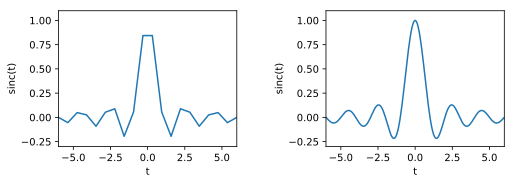

In [8]:
import matplotlib.pyplot as plt
t = np.linspace(-6,6,20)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8.0, 2.5))
ax1.plot(t,np.sinc(t))
ax1.axis([-6,6,-0.3,1.1])
ax1.set_xlabel('t')
ax1.set_ylabel('sinc(t)')
t = np.linspace(-6,6,200)
ax2.plot(t,np.sinc(t))
ax2.axis([-6,6,-0.3,1.1])
ax2.set_xlabel('t')
ax2.set_ylabel('sinc(t)')
fig.subplots_adjust(wspace=0.5)
plt.show()

可以看出取不同的步长，画出曲线的精细程度不同。

## 4.

(a) 定义以下的函数：

In [9]:
def myexp(t, sigma=-0.2, omega=5, A=1, plot=False):
    x = A*np.exp((sigma+1.0j*omega)*t)
    if plot:
        f, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(7.5, 6.0))
        ax1.plot(t,np.abs(x))
        ax2.plot(t,np.angle(x)*180/np.pi)
        ax3.plot(t,np.real(x))
        ax4.plot(t,np.imag(x))
        ax1.set_title('Magnitude')
        ax2.set_title('Phase')
        ax3.set_title('Real Part')
        ax4.set_title('Imaginary Part')
        f.subplots_adjust(hspace=0.5,wspace=0.3)
        plt.show()
    return x

则用以下语句调用时会画出信号波形：

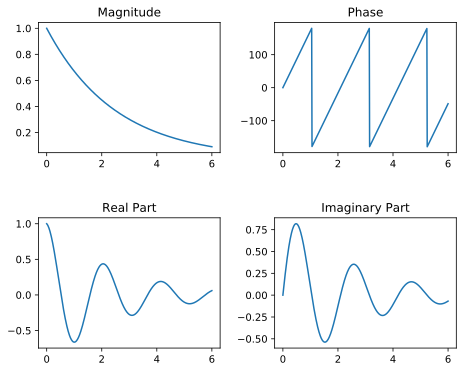

In [10]:
t = np.linspace(0,6,500)
x = myexp(t,-0.4,3,1,True)

而用以下语句调用则只得到结果，不会画出信号：

In [11]:
x = myexp(t,-0.4,3,1)

如调用时不提供后几个输入变量，则使用默认的`sigma=-0.2, omega=5, A=1`：

In [12]:
x = myexp(t)

(b) 参考程序如下：

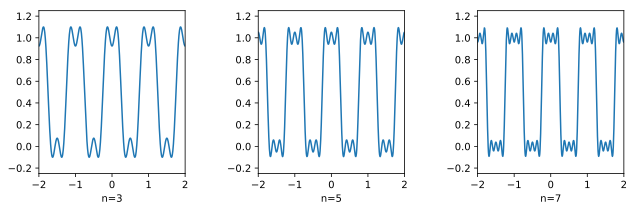

In [13]:
n = 7
t = np.linspace(-2,2,500)
x = np.zeros((2*n+1, len(t)),dtype=np.complex128)
for k in range(-n,n+1):
    x[(n+k)]=myexp(t,0,2*np.pi*k,np.sinc(k/2)/2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10.5, 3.0))
axs = [-2,2,-0.25,1.25]
x1 = x[np.arange(n-3,n+1+3),:]
y = np.sum(x1, axis=0)
ax1.plot(t,y.real)
ax1.set_xlabel('n=3')
ax1.axis(axs)
x1 = x[np.arange(n-5,n+1+5),:]
y = np.sum(x1, axis=0)
ax2.plot(t,y.real)
ax2.set_xlabel('n=5')
ax2.axis(axs)
y = np.sum(x, axis=0)
ax3.plot(t,y.real)
ax3.set_xlabel('n=7')
ax3.axis(axs)
fig.subplots_adjust(wspace=0.5)
plt.show()

## 5

参考程序如下:

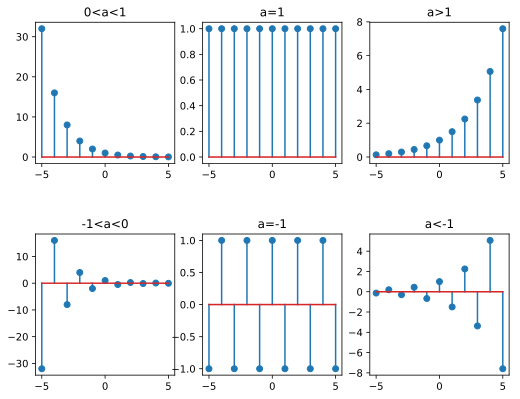

In [14]:
k = np.arange(-5,6)
fig, ax = plt.subplots(2,3,figsize=(8.5, 6.5))
ax[0,0].stem(k,np.power(0.5,k))
ax[0,0].set_title('0<a<1')
ax[0,1].stem(k,np.power(1.,k))
ax[0,1].set_title('a=1')
ax[0,2].stem(k,np.power(1.5,k))
ax[0,2].set_title('a>1')
ax[1,0].stem(k,np.power(-0.5,k))
ax[1,0].set_title('-1<a<0')
ax[1,1].stem(k,np.power(-1.,k))
ax[1,1].set_title('a=-1')
ax[1,2].stem(k,np.power(-1.5,k))
ax[1,2].set_title('a<-1')
fig.subplots_adjust(hspace=0.5)
plt.show()

## 6

参考程序如下。先编写两个函数:

In [15]:
def rectpuls(t,tau):
    x = np.zeros(len(t))
    idx = np.where(np.logical_and(t>=-tau/2, t<tau/2))
    x[idx] = 1.
    return x

def tripuls(t,tau):
    x = np.zeros(len(t))
    idx = np.where(np.logical_and(t>=-tau/2, t<=0))
    x[idx] = (t[idx]+tau/2)/(tau/2)
    idx = np.where(np.logical_and(t<tau/2, t>0))
    x[idx] = -(t[idx]-tau/2)/(tau/2)
    return x

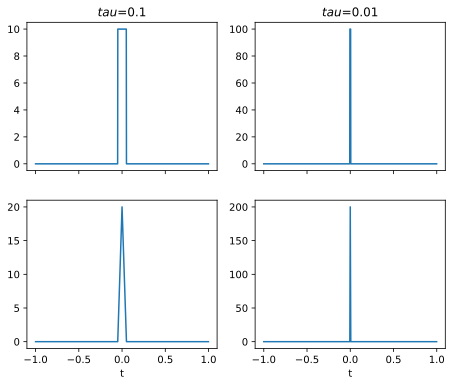

In [16]:
t = np.arange(-1,1,0.001)
fig, ax = plt.subplots(2,2,figsize=(7.5, 6.0),sharex='col')
tau = 0.1
x = rectpuls(t,tau)/tau
ax[0,0].plot(t,x)
ax[0,0].set_title('$tau$=0.1')
x = tripuls(t,tau)/tau*2
ax[1,0].plot(t,x)
ax[1,0].set_xlabel('t')
tau = 0.01
x = rectpuls(t,tau)/tau
ax[0,1].plot(t,x)
ax[0,1].set_title('$tau$=0.01')
x = tripuls(t,tau)/tau*2
ax[1,1].plot(t,x)
ax[1,1].set_xlabel('t')
plt.show()

注意定义矩形脉冲和三角脉冲的幅度，使其满足$\int_{ - \infty }^\infty  {x\left( t \right)dt}  = 1$。